## Minhas análises serão sobre:

1. Identificação do gênero mais engajado e responsável pela administração dos produtos.
2. Levantamento dos cargos envolvidos na gestão dos produtos e do negócio. É crucial compreender se meu público-alvo principal são os proprietários ou os funcionários, incluindo gerentes e analistas.
3. Análise da distribuição de cadastros por domínio de e-mail. Isso permitirá determinar quais APIs integrar na tela de cadastro e login para otimizar a experiência dos visitantes e clientes.
4. Mapeamento das regiões onde as empresas estão localizadas. Esse conhecimento ajudará a identificar meu público-alvo e entender suas áreas de atuação e os produtos que posso oferecer.

In [1]:
##---------------------( Importar as bibliotecas )---------------------##
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

##---------------------( Carregar os dados )---------------------##
dados = pd.read_excel('Dados-Analise-IA.xlsx', sheet_name='Cadastro')

# Primeira análise será pelo cadastro do visitante.


In [2]:
# visualizar os dados de forma resumida, com 5 itens somente
dados.head()

,Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa
0,Claudio,Bispo,claudio_cssp@gmail.com,(11) 958757740,123456,123456,Masculino,Funcionario
1,Maria,Silva,maria.silva@gmail.com,(11) 98765-4321,senha123,senha123,Feminino,Funcionario
2,João,Santos,joao.santos@github.com,(21) 12345-6789,abc123,abc123,Masculino,Proprietário
3,Ana,Oliveira,ana.oliveira@hotmail.com,(31) 55555-5555,123456,123456,Feminino,Filiado
4,Pedro,Costa,pedro.costa@github.com,(41) 98765-1234,987654,987654,Masculino,Estudante


In [3]:
# criar um dataframe
tabela = pd.DataFrame(dados)

In [4]:
# Separar os dados em colunas individuais
#dados = tabela['Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa'].str.split(',', expand=True)

# Renomear as colunas
#dados.columns = ['Nome', 'Sobrenome', 'Email', 'Telefone', 'Senha', 'ConfirmacaoSenha', 'Genero', 'Empresa']


Distribuição por gênero:
Genero
Feminino     34
Masculino    17
Name: count, dtype: int64


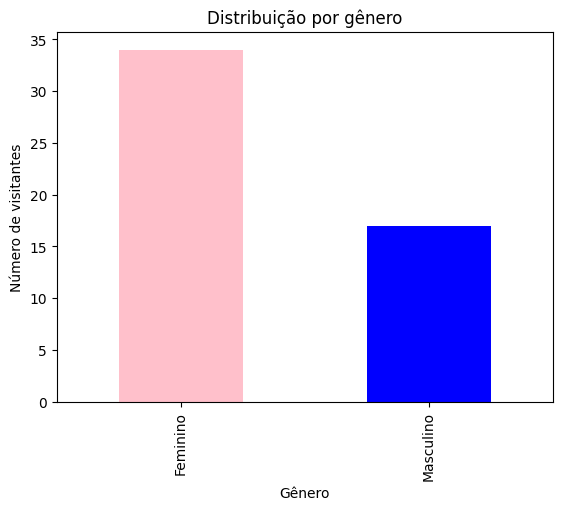

In [5]:

##---------------------( Análise Gênero )---------------------##

# Quero saber qual o publico que mas faz a pesquisa dos nossos produtos
genero_distribuicao = dados['Genero'].value_counts()
print("Distribuição por gênero:")
print(genero_distribuicao)

# Definição das cores para cada gênero
cores = {'Masculino': 'blue', 'Feminino': 'pink'}


# Gráfico
genero_distribuicao.plot(kind='bar', title='Distribuição por gênero', 
                         color = [cores[gen.strip()] 
                                  for gen in genero_distribuicao.index])
plt.xlabel('Gênero')
plt.ylabel('Número de visitantes')
plt.show()


## Minha análise sobre o gênero
O público feminino representa a maioria dos visitantes do nosso site, o que nos fornece insights valiosos sobre quem está envolvido na gestão e administração dos serviços que oferecemos. Embora a diferença entre os gêneros não seja significativa, essa predominância feminina sugere que podemos direcionar nossos esforços para estabelecer contato com esse público-alvo ao buscar novas oportunidades de negócio e que controle o fluxo do processo. Sua presença majoritária nos cadastros ressalta ainda mais a importância de entender e atender às necessidades e expectativas desse segmento específico, o que pode ser fundamental para o sucesso de nossas iniciativas.


Tipo de empresa - Distribuição 
Empresa
Funcionario      32
 Proprietário    13
 Estudante        4
 Filiado          2
Name: count, dtype: int64


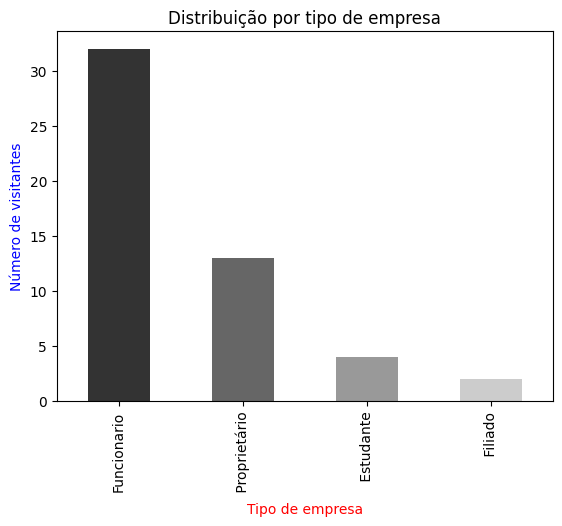

In [6]:

##---------------------( Análise pelo segmento  )---------------------## 

empresa_distribuicao = dados['Empresa'].value_counts()
print("\nTipo de empresa - Distribuição ")
print(empresa_distribuicao)

# Define a lista de tons de cinza do mais escuro para o mais claro
tons_de_cinza = ['#333333', '#666666', '#999999', '#CCCCCC', '#DDDDDD']

# Gráfico
empresa_distribuicao.plot(kind='bar', title='Distribuição por tipo de empresa', color=tons_de_cinza)
plt.xlabel('Tipo de empresa', color="red")
plt.ylabel('Número de visitantes', color="blue")
plt.show()


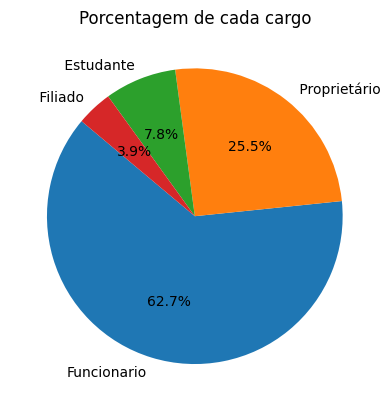

In [7]:
# Calcula a porcentagem de cada cargo
porcentagem_cargos = dados['Empresa'].value_counts(normalize=True) * 100

# Gráfico de pizza
porcentagem_cargos.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Porcentagem de cada cargo')
plt.ylabel('')
plt.show()


## Minha análise

Para compreender melhor o perfil de nossos visitantes e suas necessidades, explorei duas abordagens visuais. Primeiramente, utilizei um gráfico de barras para ilustrar a distribuição quantitativa dos cargos e sem segundo plano utilizei um gráfico de pizza para demosntrar em % a participação de cada "cargo" ou título. Sabendo que tenho poucas váriaveis para observar, esse gráfico foi o ideal para ilustrar as informações de forma mais rápida e simples.

1. Neste, observamos que os funcionários predominam, representando 62% do total, demonstrando um interesse significativo na gestão de processos e no conhecimento de ferramentas de CRM para melhorar suas rotinas de trabalho. Por outro lado, embora em menor proporção, os proprietários também buscam ativamente esse conhecimento, contribuindo com 25% das interações. Isso sugere que eles desempenham um papel crucial nas decisões relacionadas à adoção de novas tecnologias em suas empresas.

In [8]:
tabela.columns

Index(['Nome', 'Sobrenome', 'Email', 'Telefone', 'Senha', 'ConfirmacaoSenha',
       'Genero', 'Empresa'],
      dtype='object')

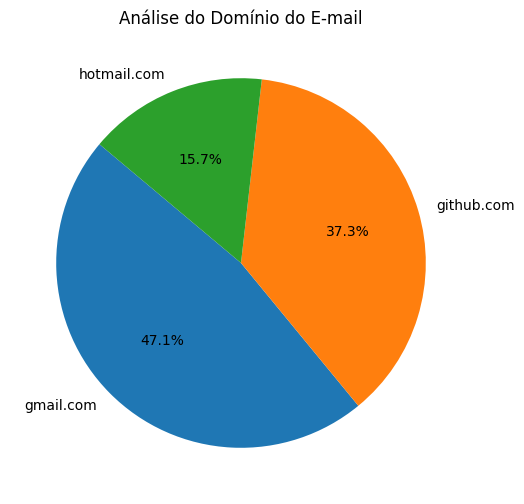

In [9]:
# Função para extrair o domínio do e-mail
def extrair_dominio(email):
    return email.split('@')[-1]

# Extrair o domínio do e-mail de cada linha
tabela['Dominio'] = tabela['Email'].apply(extrair_dominio)

# Análise do domínio do e-mail
analise_dominio_email = tabela['Dominio'].value_counts()

# Plotar gráfico de pizza para análise do domínio do e-mail
plt.figure(figsize=(8, 6))
analise_dominio_email.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Análise do Domínio do E-mail')
plt.ylabel('')
plt.show()


## Minha análise

Considerando que mais de 70% dos cadastros são realizados utilizando plataformas parceiras como Gmail ou GitHub, faz sentido investir recursos na integração desses serviços para login e cadastro. Essa integração não só simplificará o processo para os nossos potenciais clientes, permitindo que eles economizem tempo ao evitar o preenchimento manual de informações, mas também melhorará a velocidade de acesso aos nossos produtos e serviços. Ao facilitar o processo de cadastro e login, estaremos removendo possíveis barreiras de entrada para os usuários, tornando a experiência mais ágil e amigável. Além disso, ao adotar padrões de autenticação amplamente utilizados como o OAuth do Gmail e do GitHub, podemos aproveitar a confiabilidade e segurança dessas plataformas renomadas, garantindo a proteção dos dados dos nossos clientes.

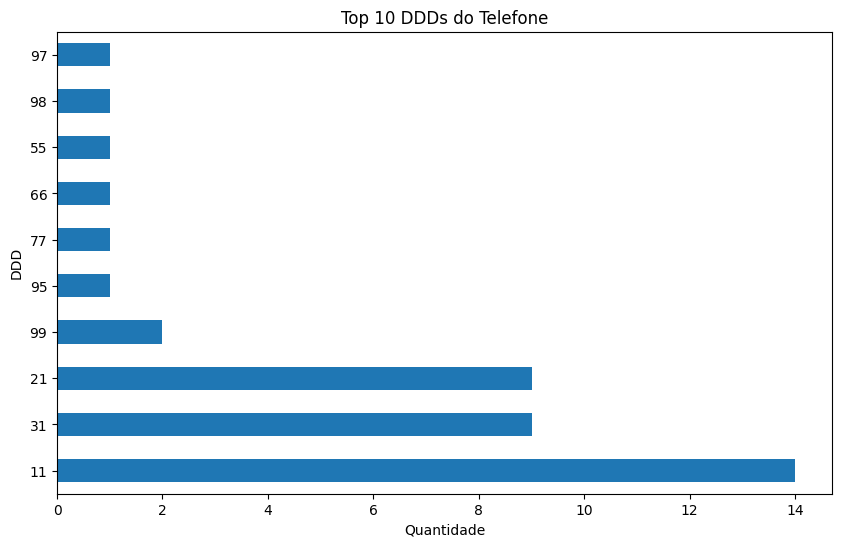

In [10]:
# Extrair o DDD para saber qual a região que posso atingir
def extrair_ddd(telefone):
    return telefone.split(')')[0].replace('(', '')

# Extrair o DDD do telefone de cada linha
tabela['DDD_Telefone'] = tabela.iloc[:, 3].apply(lambda x: extrair_ddd(x))

analise_ddd_telefone = tabela['DDD_Telefone'].value_counts().head(10)

# Plotar gráfico de barras horizontal para análise do DDD do telefone
plt.figure(figsize=(10, 6))
analise_ddd_telefone.plot(kind='barh')
plt.title('Top 10 DDDs do Telefone')
plt.xlabel('Quantidade')
plt.ylabel('DDD')
plt.show()


In [11]:

dados = {
    'DDD': ['11', '21', '31', '41', '51', '61', '71', '81', '91', '92', '93', '94', '95', '96', '97', '98', '99'],
    'Latitude': [-23.5505, -22.9068, -19.9167, -25.4284, -30.0277, -15.7801, -12.9714, -8.0476, -10.9472, -3.119, -3.1064, -2.5355, -5.7945, -5.0847, -7.1357, -2.529, -3.7183],
    'Longitude': [-46.6333, -43.1729, -43.9333, -49.2733, -51.2287, -47.9292, -38.5014, -34.8768, -37.0731, -60.0212, -60.0284, -44.3039, -35.211, -42.8047, -34.9059, -44.3029, -38.5431]
}

# Criar DataFrame com os dados
df = pd.DataFrame(dados)

# Criar mapa de calor
mapa = folium.Map(location=[-15.788497, -47.879873], zoom_start=4)

heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(mapa)

# Exibir mapa para sabermos onde está concentrado nosso clientes/visitantes
mapa

## Minha análise - Aqui vou apontar sobre os produtos que poderei ofercer para os cliente de acordo com a região, vai muito de encontro com o nosso formulário de necessidade que busca mapear o perfil do cliente e sua necessidade sobre as soluções da SalesForce

Análise de Cadastro e Soluções da Salesforce para São Paulo, Rio de Janeiro e Minas Gerais

Ao analisar os cadastros em nossa plataforma, percebemos uma concentração significativa nos estados de São Paulo, Rio de Janeiro e Minas Gerais, refletida pelos DDDs associados aos números de telefone informados. Essa concentração sugere uma demanda considerável por nossos serviços nessas regiões, indicando oportunidades valiosas para fortalecer nossa presença e expandir nossos negócios.

São Paulo (11):

São Paulo é o maior centro econômico do país, caracterizado por uma ampla diversidade de setores industriais e de serviços. Nesse cenário dinâmico, as soluções da Salesforce, como o Sales Cloud e o Service Cloud, podem oferecer ferramentas poderosas para otimizar processos de vendas, gerenciamento de relacionamento com o cliente (CRM) e suporte ao cliente. Com o Sales Cloud, por exemplo, equipes de vendas podem acompanhar leads, oportunidades e fechar negócios de forma eficiente, enquanto o Service Cloud permite oferecer um suporte excepcional ao cliente.

Rio de Janeiro (21):

O Rio de Janeiro, conhecido por sua beleza natural e diversidade cultural, abriga uma variedade de empresas e organizações que buscam se destacar em seus respectivos mercados. Aqui, soluções como o Marketing Cloud e o Commerce Cloud da Salesforce podem ser especialmente relevantes. O Marketing Cloud oferece ferramentas avançadas de automação de marketing e personalização de campanhas, enquanto o Commerce Cloud permite criar experiências de compra online excepcionais para os clientes.

Minas Gerais (31):

Minas Gerais é um estado com uma economia diversificada, que abrange desde a indústria até o agronegócio. Para empresas em Minas Gerais, as soluções da Salesforce, como o Community Cloud e o Einstein Analytics, podem ser essenciais. O Community Cloud possibilita a criação de comunidades online para clientes, parceiros e funcionários, promovendo o engajamento e a colaboração. Já o Einstein Analytics oferece recursos avançados de análise de dados e inteligência artificial, permitindo insights valiosos para impulsionar o crescimento e a inovação.

análise final:

Ao reconhecer a importância estratégica de São Paulo, Rio de Janeiro e Minas Gerais em nossa base de clientes, podemos direcionar nossos esforços para atender às necessidades específicas dessas regiões. Com as soluções da Salesforce, estamos preparados para oferecer ferramentas poderosas e inovadoras que capacitam nossos clientes a alcançar o sucesso em seus negócios e impulsionar o crescimento em seus mercados.
